# Data Discreption

This dataset contains student performance data from two Portuguese secondary schools. It includes attributes such as student grades, demographic, social, and school-related features. The data were collected using school reports and questionnaires. The goal of this dataset is to predict student performance in secondary education.



## Attributes

1. **school**: student's school (binary: 'GP' for Gabriel Pereira or 'MS' for Mousinho da Silveira)
2. **sex**: student's sex (binary: 'F' for female or 'M' for male)
3. **age**: student's age (numeric: from 15 to 22)
4. **address**: student's home address type (binary: 'U' for urban or 'R' for rural)
5. **famsize**: family size (binary: 'LE3' for less than or equal to 3 or 'GT3' for greater than 3)
6. **Pstatus**: parent's cohabitation status (binary: 'T' for living together or 'A' for apart)
7. **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)
8. **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)
9. **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup**: extra educational support (binary: yes or no)
17. **famsup**: family educational support (binary: yes or no)
18. **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities**: extra-curricular activities (binary: yes or no)
20. **nursery**: attended nursery school (binary: yes or no)
21. **higher**: wants to take higher education (binary: yes or no)
22. **internet**: Internet access at home (binary: yes or no)
23. **romantic**: with a romantic relationship (binary: yes or no)
24. **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health**: current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences**: number of school absences (numeric: from 0 to 93)

### Target Variable

31. **G1**: first period grade (numeric: from 0 to 20)
32. **G2**: second period grade (numeric: from 0 to 20)
33. **G3**: final grade (numeric: from 0 to 20, output target)

### Citation

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.


# Understanding The Data

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

## import Data

In [3]:
df = pd.read_csv("Data/student-por.csv",sep=";")

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.shape

(649, 33)

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
df.duplicated().sum()

0

We Decided that our target will be the grade for 3rd year

In [10]:
df["avg_Grade"] = (df["G1"]+df["G2"]) /2

In [11]:
df.drop(columns=["G1","G2"],inplace=True)

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,avg_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,12.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,12.0


In [13]:
numerical_columns = df.select_dtypes(include=['int64','Float64']).columns
numerical_columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'avg_Grade'],
      dtype='object')

## Features Distributions

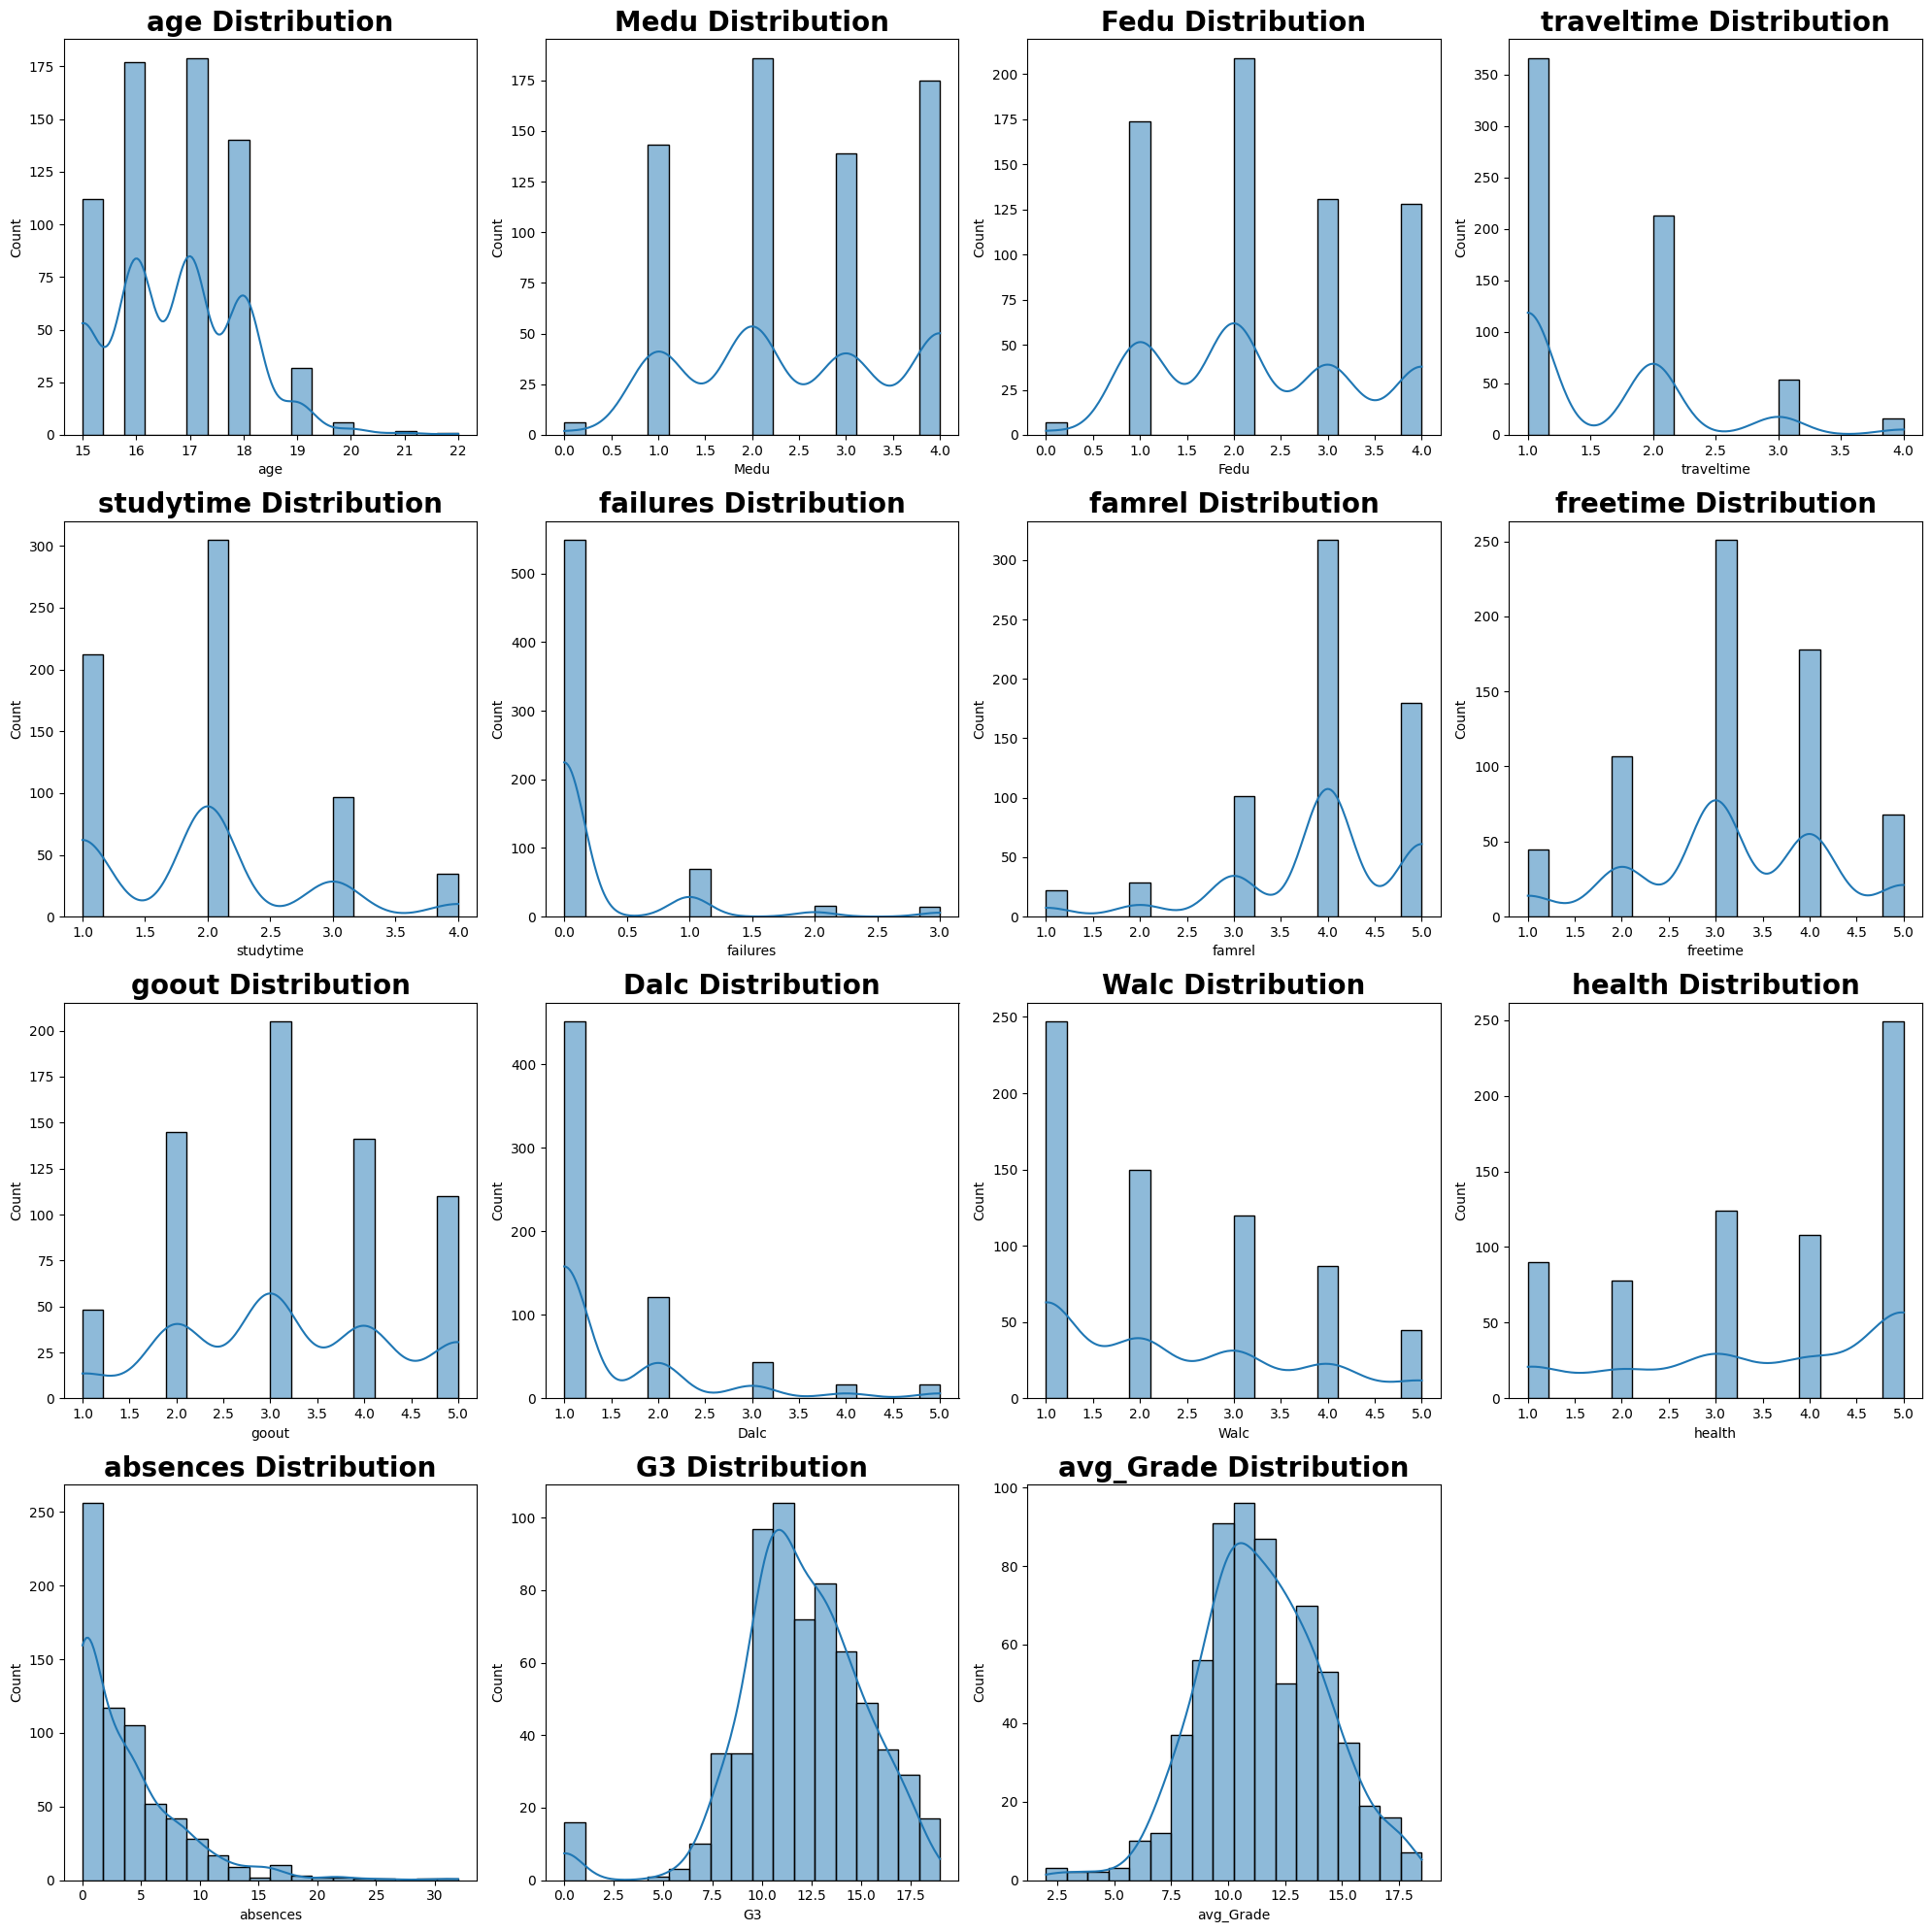

In [14]:
fig = plt.figure(figsize=(20, 20))

for i in range(len(numerical_columns)):
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.7, wspace=0.4, hspace=0.4)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{numerical_columns[i]} Distribution",
              fontdict={'fontsize': 20, 'fontweight': 'bold'})
    sns.histplot(df[numerical_columns[i]], bins='rice', kde=True)  # Use square root estimator
    plt.tight_layout()

    plt.savefig('Features_Distributions.png')

plt.show()


### Target ralationship with other features 

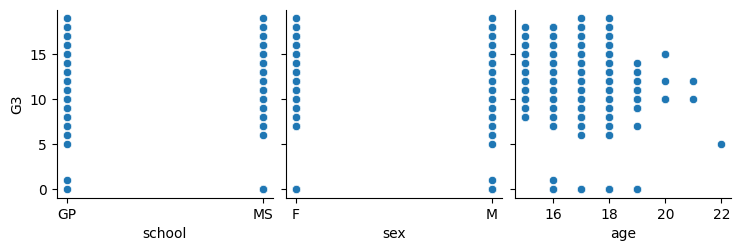

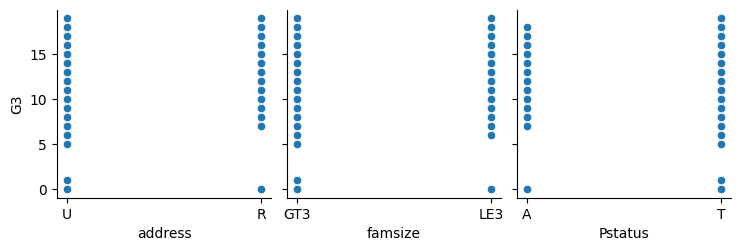

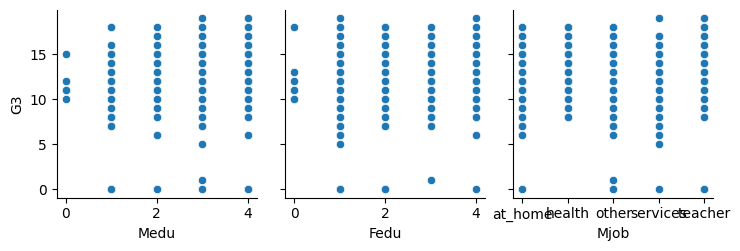

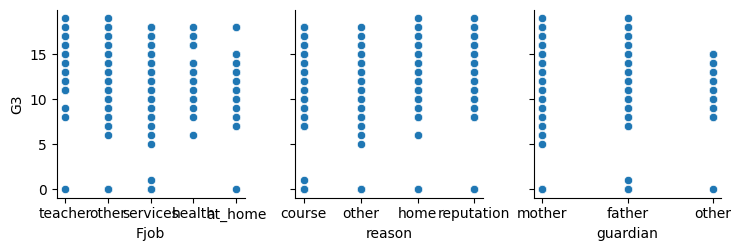

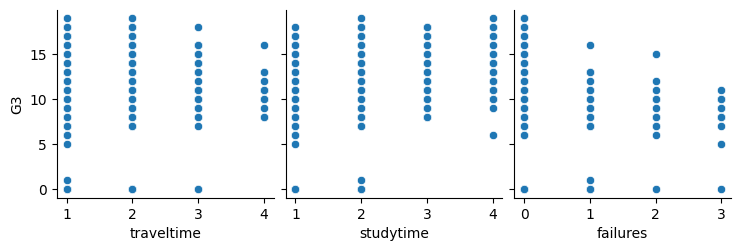

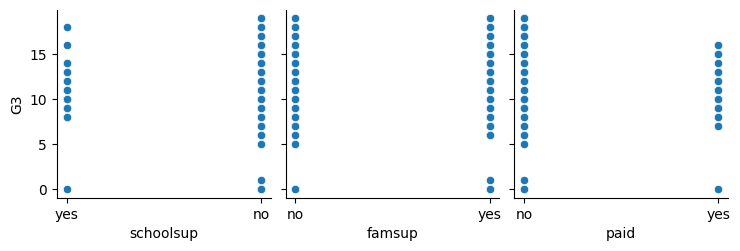

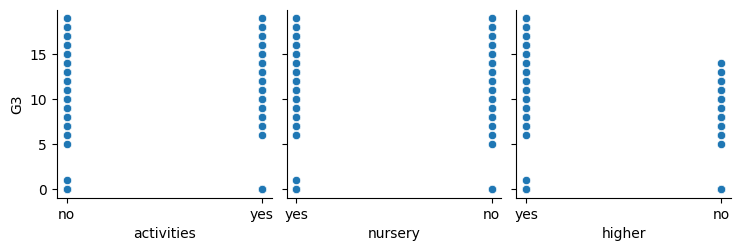

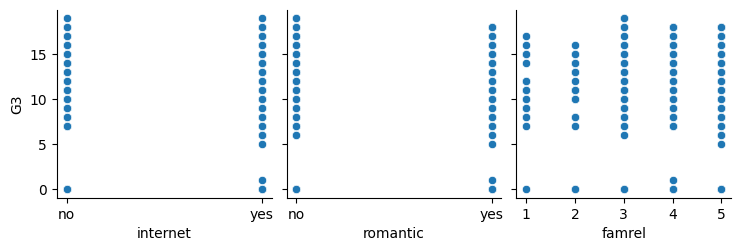

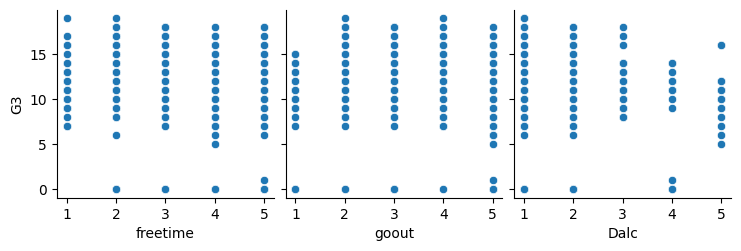

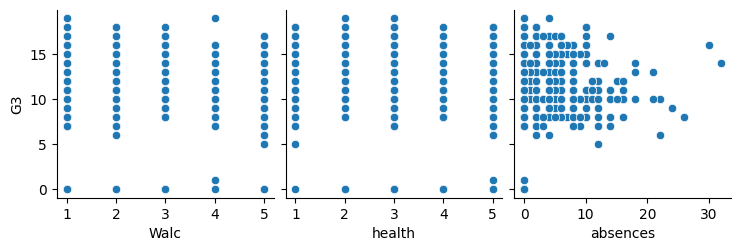

In [15]:

cols = list(df.columns)
cols.remove('G3')
for i in range(3,len(cols),3):
    sns.pairplot(df,x_vars=cols[i-3:i],y_vars=["G3"])
    plt.savefig(f'Pairplot{i}.png')


        

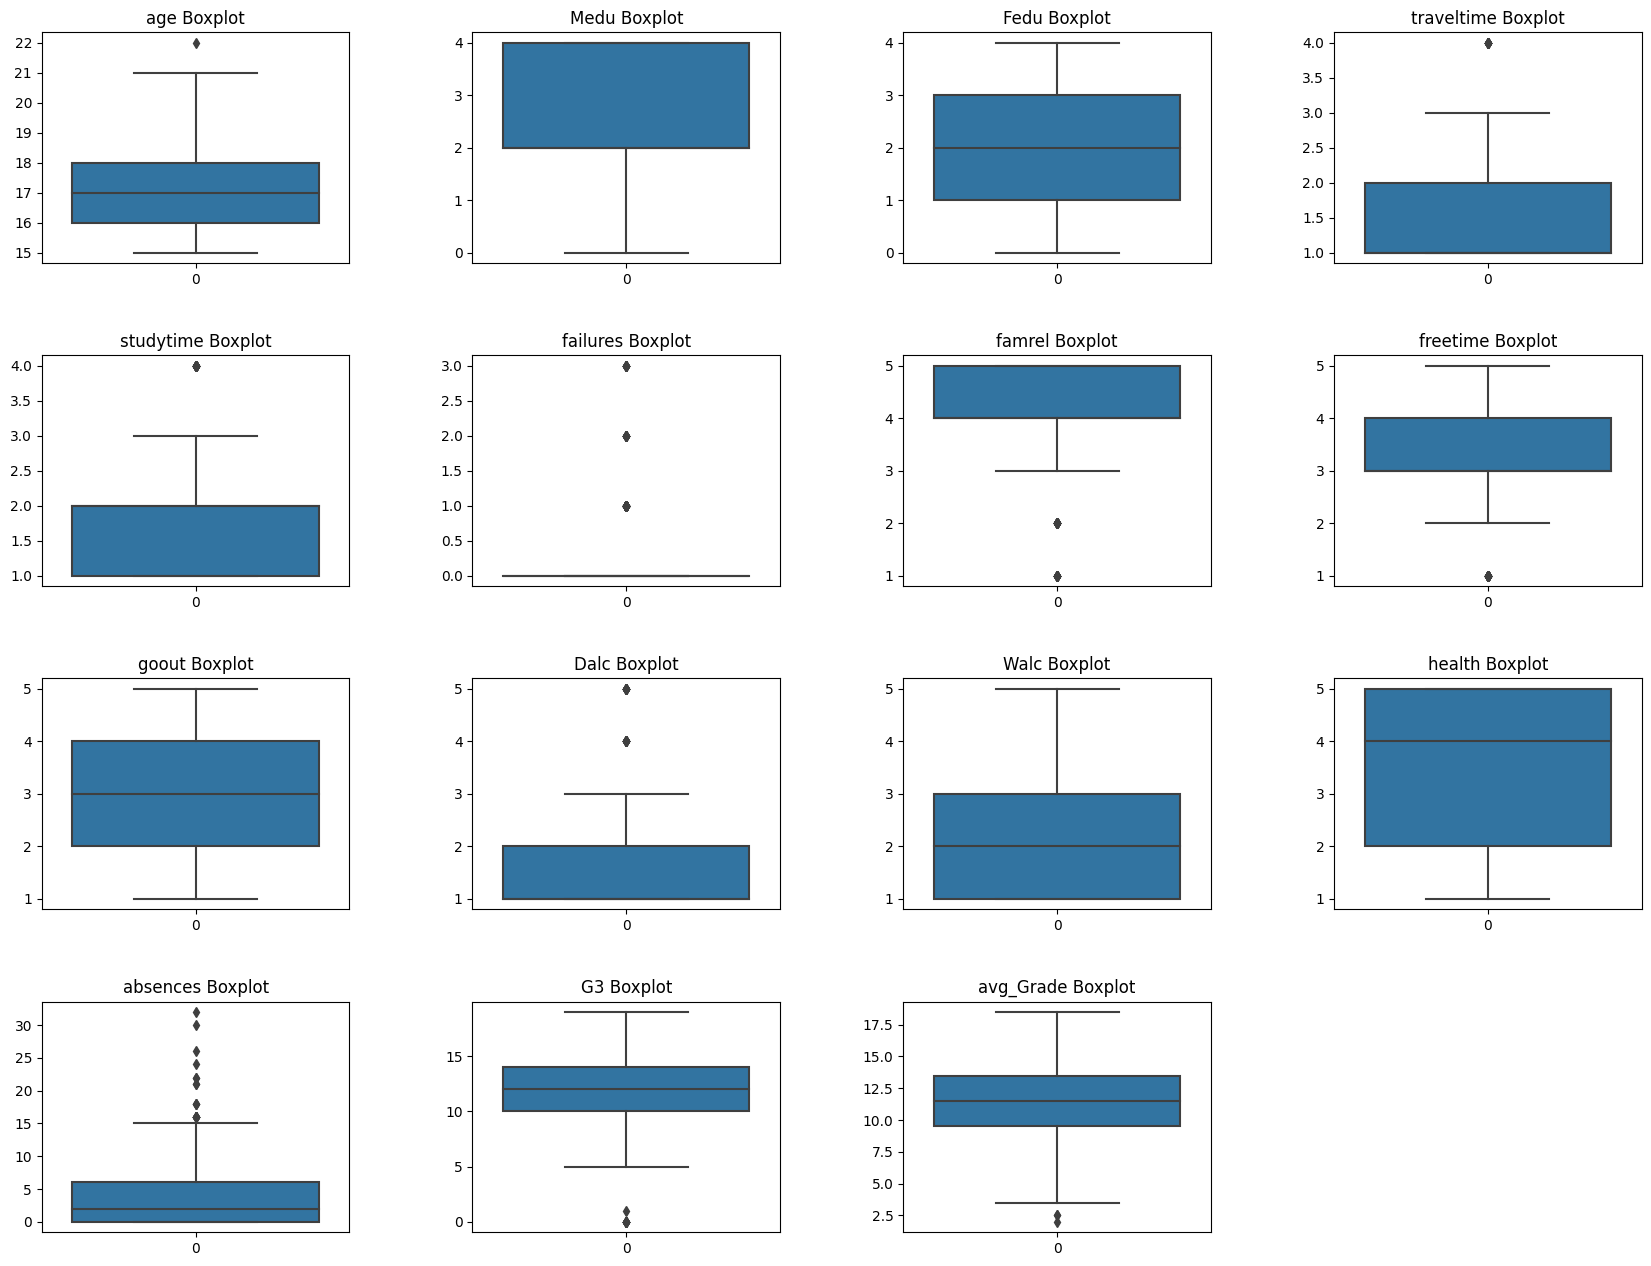

In [16]:
numerical_columns_list = numerical_columns

fig = plt.figure(figsize=(20, 20))

for i in range(len(numerical_columns_list)):
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.7, wspace=0.4, hspace=0.4)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{numerical_columns_list[i]} Boxplot")
    sns.boxplot(df[numerical_columns_list[i]],orient="v")
    
plt.savefig('Boxplot.png')
plt.show()


There exists outliers in absences, failures, farmel, Dalc, travelyime, studytime, avg_grade and age

## Outliers Removal

In [17]:
df["failures"].value_counts()

failures
0    549
1     70
2     16
3     14
Name: count, dtype: int64

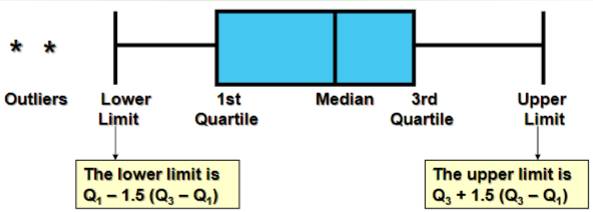

We will keep the outliers in failures otherwise it will all be zeros

In [18]:
for col in numerical_columns_list:
    if col == "failures":
        continue
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] #masking


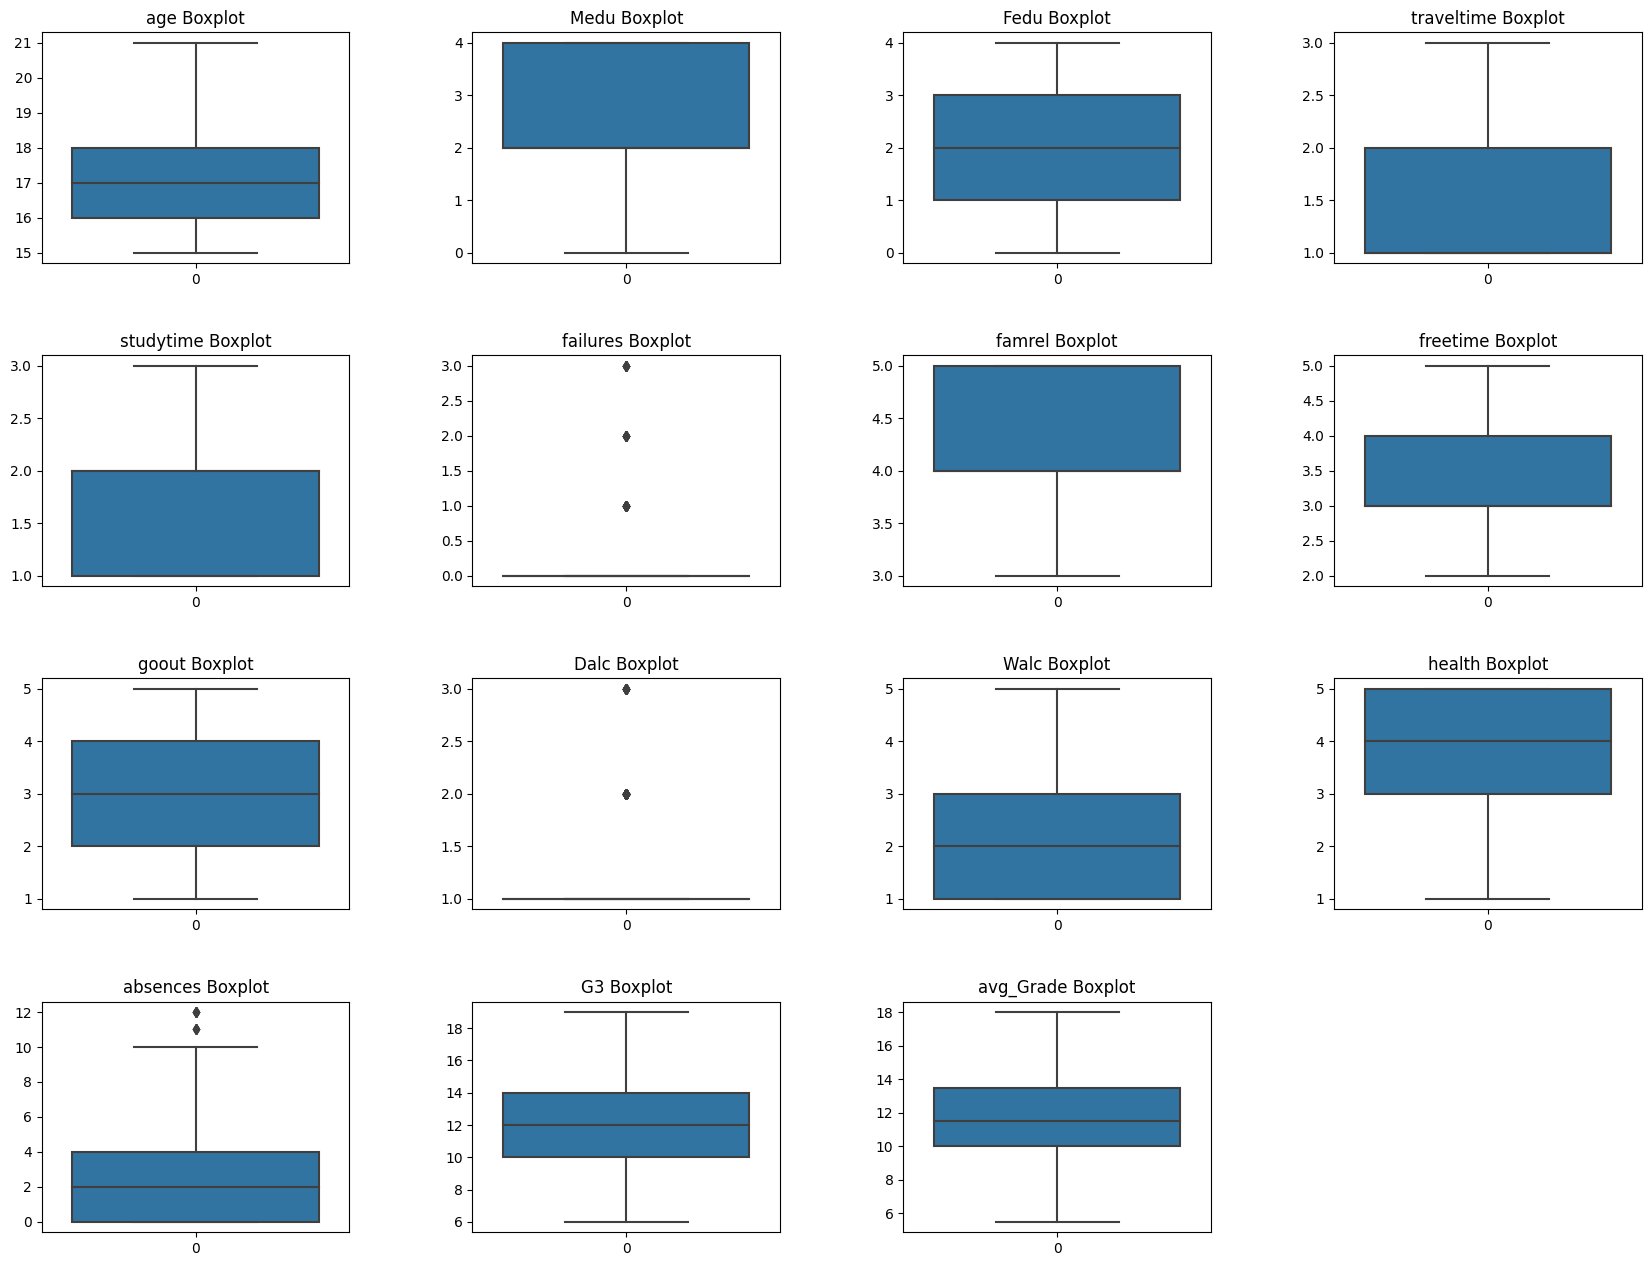

In [19]:
# numerical_columns_list = df.select_dtypes(include=['int64', 'float64']).columns

fig = plt.figure(figsize=(20, 20))

for i in range(len(numerical_columns_list)):
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.7, wspace=0.4, hspace=0.4)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{numerical_columns_list[i]} Boxplot")
    sns.boxplot(df[numerical_columns_list[i]],orient="v")
plt.savefig('Boxplot_after.png')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      465 non-null    object 
 1   sex         465 non-null    object 
 2   age         465 non-null    int64  
 3   address     465 non-null    object 
 4   famsize     465 non-null    object 
 5   Pstatus     465 non-null    object 
 6   Medu        465 non-null    int64  
 7   Fedu        465 non-null    int64  
 8   Mjob        465 non-null    object 
 9   Fjob        465 non-null    object 
 10  reason      465 non-null    object 
 11  guardian    465 non-null    object 
 12  traveltime  465 non-null    int64  
 13  studytime   465 non-null    int64  
 14  failures    465 non-null    int64  
 15  schoolsup   465 non-null    object 
 16  famsup      465 non-null    object 
 17  paid        465 non-null    object 
 18  activities  465 non-null    object 
 19  nursery     465 non-null    object

In [21]:
df.to_csv("cleaned_df.csv",index=False)

In [22]:
df_vis = pd.read_csv("cleaned_df.csv")

In [23]:
sex_labels = {'M': 'Male', "F": 'Female'}
df_vis['sex_label'] = df_vis['sex'].map(sex_labels)

class_distribution = df_vis['sex_label'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(names=class_distribution.index, values=class_distribution.values,
             title='Distribution of sex Class')

# Display the pie chart
fig.show()


In [24]:
import pandas as pd
import plotly.express as px

# Assume df is your DataFrame containing the data
goout_labels = {1: 'Low', 2: 'Moderate', 3: 'Average', 4: 'High', 5: 'Very High'}
df_vis['goout_label'] = df_vis['goout'].map(goout_labels)

# Calculate the distribution of grades for students who go out and those who don't
goout_distribution = df_vis['goout_label'].value_counts()

# Create pie charts for the distribution of grades
fig_goout = px.pie(names=goout_distribution.index, values=goout_distribution.values,
                   title='Distribution of Grades for Students Who Go Out')

# Display the pie charts
fig_goout.show()


In [25]:
df_vis.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3', 'avg_Grade', 'sex_label',
       'goout_label'],
      dtype='object')

In [26]:
fig_goout = px.bar(x=goout_distribution.index, y=goout_distribution.values,
                   title='Distribution of Grades for Students Who Go Out',
                   labels={'x': 'Grades', 'y': 'Count'},color=goout_distribution.index)


In [27]:
fig_goout.show()

In [28]:
import pandas as pd
import plotly.express as px

# Assume df is your DataFrame containing the data

# Calculate the average grades for students from each school
average_grades_by_school = df.groupby('school')['G3'].mean().reset_index()

# Create a bar chart for average grades by school
fig = px.bar(average_grades_by_school, x='school', y='G3', 
             title='Average Grades by School',
             labels={'school': 'School', 'G3': 'Average Grades'},color="school")

# Display the bar chart
fig.show()


In [29]:
fig5 = px.box(df, x='Dalc', y='G3', title='Grades (G3) vs Weekday Alcohol Consumption (Dalc)',
              labels={'Dalc': 'Weekday Alcohol Consumption', 'G3': 'Final Grade'})
fig5.show()


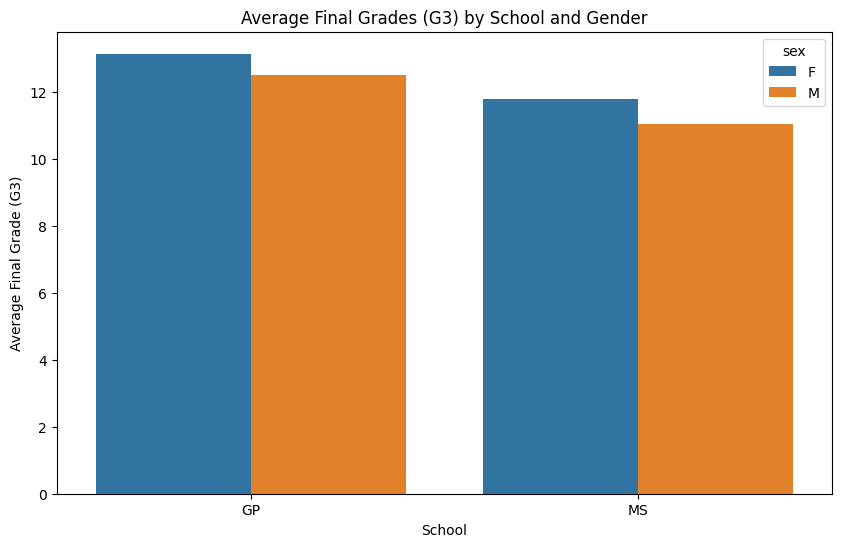

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='school', y='G3', data=df, hue='sex', ci=None)
plt.title('Average Final Grades (G3) by School and Gender')
plt.xlabel('School')
plt.ylabel('Average Final Grade (G3)')
plt.show()
plt.savefig('AvgFinal_Grade_Gender_School.png')

In [31]:
fig2 = px.box(df, x='address', y='G3', color='higher',
              title='Box Plot of Final Grades (G3) by Address Type and Desire for Higher Education',
              labels={'address': 'Address Type', 'G3': 'Final Grade (G3)'})

fig2.show()


In [32]:
fig1 = px.violin(df, x='internet', y='G3', color='romantic', box=True,
                 title='Distribution of Final Grades (G3) by Internet Access and Romantic Relationship',
                 labels={'internet': 'Internet Access', 'G3': 'Final Grade (G3)'})
fig1.show()
